<a href="https://colab.research.google.com/github/ljs7463/Basic_statistic/blob/main/%EC%9E%84%EC%A0%95%EC%84%9D/Statistics_Basic_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

< 기초통계 >

In [ ]:
# 필요한 csv파일 불러오기
import pandas as pd
import matplotlib.pyplot as plt

#state = pd.read_csv('/content/state.csv')
#kc_tax = pd.read_csv('/content/kc_tax.csv')
#airline_stats = pd.read_csv('/content/airline_stats.csv')
#loans_income = pd.read_csv('/content/loans_income.csv')
session_times = pd.read_csv('/content/web_page_data.csv')
session_times.Time = 100 * session_times.Time

# CH1. 탐색적 데이터분석

![](https://images.velog.io/images/ljs7463/post/ff724f1c-8cc1-4afc-a3b7-0b653910e1ec/crowd-1699137_640.jpg)

# 데이터의 종류

## 1. 범주형(Categorical)
### - 명목형(Nominal) : 순서가 없고, 셀 수 있다.
         (Ex) 성별(남 or 여), 성공여부, 혈액형)/ one-hot encoding사용
### - 순서형(Oridinal) : 카테고리들이 순서가 있다. 
	     (Ex) 만족도조사(매우만족, 만족, 보통, 불만족, 매우불만족)/ LabelEncoding사용
## 2. 수치형(Numerical)
### - 이산형(Discrete data) : 수치적 의미를 가지지만 소수점X(counted)
	     (Ex) 주사위가 2가 나올 횟수 1번,2번/ 사람이 1명 2명)
### - 연속형(Continuous data) : 셀수없고 측정가능한 데이터(소수점 가능,measured)
	     (Ex) 측정해서 나온데이터 : 키, 몸무게 -> 180.1, 180.2, 180.3....)
        

### 연속성 데이터 설명
- 이산데이터와 달리 Group을 지어서 Table을 만들어야한다.

179(cm) - 1명
179.1   - 3명
179.2   - 2명
179.3   - 1명
.
.
.
.
180.1   - 1명

위와 같은 데이터가 있을때 한 데이터 마다 따로 계산을 하는것이 아닌
그룹화 시킨다. 
- 179 ~ 180 : 1명
- 180 ~ 181 : 3명 

위와같은것은 표로 만들게 되면 빈도표/ 빈도분포표(Frequency Table)이라고 부른다.


### 주의해야 할 것
서울을 1, 부산을 2, 대구를 3으로 했을때는 
1, 2, 3은 카테고리컬 데이터로 볼 수 있다. 즉, 숫자라고 numerical data가 아니다.

---

## 💡 위치 추정
데이터를 살펴보는 기초 단계중 하나는 각 feature(변수)의 대푯값을 구하는 것이다. 이는 곧 값이 어디쯤 위치하는지(중심경향성)를 나타내는 추정값이다.

- 평균 : 모든 값들의 합을 개수로 나눈 값
- 가중평균 : 가중치를 곱한 값의 총합을 가중치의 총합으로 나눈 값
- 중간값 : 데이터에서 가장 가운데 위치한 값
- 백분위수(percentile) : 전체 데이터의 X%를 아래에 두는 값
Ex) 1사분면 : 하위 25%
- 가중 중간값 : 데이터를 정렬한 후, 각 가중치 값을 위에서부터 더할 때, 총합의 중간이 위치하는 데이터 값
- 절사평균 : 정해진 개수의 극단값을 제외한 나머지 값들의 평균
- 로버스트하다(robust) : 극단값들에 민감하지 않다는 것을 의미한다.
- 특잇값 : 대부분의 값과 매우 다른 데이터 값

### 📈 평균 
- 평균은 가장 기본적이면서 친숙한 위치 추정 방법이다. 평균은 모든 값의 총합을 개수로 나눈 값이다.
- 코드로는 mean()을 사용해서 평균을 구할 수 있다.
- 극단값에 민감하다.

### 📈 절사평균 
- 평균을 조금 변형한 것 중 하나로서 값들을 크기순서로 정렬을 한 후, 양 끝에서 일정 개수의 값들을 삭제한 뒤 남은 값들을 가지고 구한 평균을 말한다.
- 즉, 절사평균은 극단값의 영향을 제거한다는 것이다. 양 극단값을 제거함으로서 좀 더 이상치의 영향을 덜 받아 로버스트하게 된다.
- 코드로는 먼저 from scipy import stats로 메소드를 불러오고 stats.trim_mean()을 통해 구할 수 있습니다. 이때 또 넣어주어야 할 값이 각 끝에 빼줄 값의 크기를 부여 해 주어야한다.  stats.trim_mean(fruits['apple'], 0.1 ) 이런식으로 뒤에 0.1을 넣으면 위,아래 10%를 뜻한다.

In [ ]:
from scipy import stats
df = pd.DataFrame({'House' :[1,2,51,52,53,54,55,99,100,50000],
                   'Car' : [0,0,1,1,1,1,1,1,1,3]})
df

,House,Car
0,1,0
1,2,0
2,51,1
3,52,1
4,53,1
5,54,1
6,55,1
7,99,1
8,100,1
9,50000,3


In [ ]:
df['House'].mean()  # 평균

5046.7

In [ ]:
import pandas as pd
from scipy.stats import trim_mean
trim_mean(df['House'],0.1) # 절사평균(10%)

58.25

### 📈 가중평균
- 또 다른 종류의 평균으로, 각 데이터에 사용자가 지정한 가중치(w)를 곱한 값들의 총합을 다시 가중치의 총합으로 나누어준 가중평균이 있다.
- 가중평균을 사용하는 이유는 센서를 통해 데이터의 평균을 낸다고 가정했을때 특정 하나의 센서가 다른 센서들에 비해 정확도가 떨어질 경우에는 떨어지는 해당 센서에서 나오는 데이터는 낮은 가중치를 주는것이다
- 또 다른 예로 데이터를 수집할때 여러 대조군에서 수집한다고 가정하자, 이때 특정 A의 그룹은 데이터가 작아 수집되는 데이터 양이 적은데 이때 소수그룹에는 좀 더 높은 가중치를 적용할 필요가 있다.(반드시 그런것은 아니다.)

In [ ]:
import numpy as np
np.average(df['House'], weights = df['Car']) # 가중평균구하기

15046.4

평균 : 5046.7/ 절사평균 : 58.25/ 가중평균 15046.4

### 📈 중간값
- 데이터를 길게 정렬했을 때, 한가운데 위치하는 값을 중간값이라고 한다. 모든 관측지를 다 사용하는 평균과는 다르게 중간값은 정렬된 데이터의 가운데에 위치한 값들만으로 결정된다. 
- 위와 같은 이유로 중간값이 잘 사용되지 않을것 같지만 데이터에 민감한(이상치 영향등)평균보다 중간값이 위치 추정에 오히려 더 유리할 수 있다.
- 예를 들어 서울의 A동네에 있는 주민들의 평균연봉 데이터를 가지고 있다고 가정할때, 해당 동네에 대기업 회장이 살고 있을 경우 평균의 데이터는 매우 다르게 나타날 것이다. 하지만 만약 중간값을 사용한다면 대기업 회장이 얼마를 벌고 있는지와 상관없이 중간값은 매우 비슷하게 나올 것이다.

### 📈 가중 중간값
- 가중평균을 사용하는 것과 마찬가지로 가중 중간값 역시 사용할 수 있다. 어떤 위치를 기준으로 상위 절반의 가중치의 합이 하위 절반의 가중치의 합과 동일한 위치의 값이 된다. 중간값과 마찬가지로 가중 중간값 역시 특잇값에 로버스트하다.

In [ ]:
df['House'].median() # 중간값

53.5

In [ ]:
!pip install wquantiles

In [ ]:
import wquantiles
wquantiles.median(df['House'],weights = df['Car']) # 가중 중간값

76.99999999999999

### 📈 특잇값, 이상값
- 데이터 분석을 하다보면 가끔 이 특잇값은 유익한 정보를 제공하기도 하고, 때로는 골칫거리가 되기도 한다. 하지만 이와 반대로, 이상검출에서는 대부분의 정상적인 데이터보다는 예외적으로 측정된 특잇값이 바로 주된 관심의 대상이 될 수 있다.

### 🎓 로버스트하다(robust) 
- 극단값들에 민감하지 않다는 것을 의미한다.

---


## 💡 변이 추정
- 변이 추정은 **데이터 값이 얼마나 밀집해 있는지 혹은 퍼져 있는지를 나타내는 산포도**를 나타낸다.

### 📈 편차(deviation)
- 관측값과 위치 추정값 사이의 차이
- 쉽게 말하면 회귀식에서 실제 관측값과 우리가 추정하는 값의 차이를 뜻한다.

### 📈 평균절대편차
- 변이를 측정하는 한 가지 방법은 편차들의 대푯값을 추정것인데 편차의 경우 음수와 양수가 있고, 편차의 합은 항상 0이 되기때문에 편차에 절대값을 주고 이의 평균을 구하는것이다. 이것이 평균절대편차이다.
- 평균과의 편차의 절대값의 평균을 말한다.
- 평균 구하기 -> 각 측정값들의 평균으로부터 얼마나 떨어져있는지 구하고 절대값 씌우기(절대편차) -> 모든 편차 더하기 -> (편차의합) / (측정값의 개수) 


**(가장 유명하고 자주쓰이는 추정 방법은 제곱편차를 이용한 분산과 표준편차이다)**

### 📈 분산
- 분산이란 내가 가진 자료(데이터)가 평균값을 중심으로 퍼져있는 거리를 말한다.
- 평균과의 편차를 제곱한 값들의 합을 n-1로 나눈 값. n은 데이터 개수/ **(편차제곱의합)/(n-1)**
- 분자를 "제곱합" 분모를 "자유도"라고 한다.
- n-1로 나누어 주는 이유는 분자에서 평균값을 빼 주었기 때문에 평균을 빼고 나눠어 줘서 n-1이다.



### 📈 표준편차
- 분산과 의미가 같지만 Scale의 차이가 있다.
- 표준편차는 분산의 제곱근이다.(분산의 루트)
- 분산의 경우 제곱의 합이기 때문에 값이 커지게 된다, 따라서 값의 크기를 루트를 씌워 작게 만드는것이 표준편차이고 의미는 분산과 같다고 볼 수 있다.
- 루트를 통해 기존의 데이터와 같은 척도(scale)에 있기 때문에 분산보다 훨씬 해석하기가 쉽다
- 실제로 더 수식이 복잡한 표준편차를 평균절대편차보다 더 선호하는 이유는 수학적인 관점으로 제곱을 하는값이 절대값을 한 값보다 통계모델을 다루는데 편리하기 때문이다.


**(분산, 표준편차, 평균절대편차 모두 Outlier(특잇값, 극단값)에 로버스트하지 않다.  그 중에서도 분산과 표준편차는 제곱편차를 이용하는 계산이므로 더욱 특잇값에 민감하다.)**


### 📈 중간값의 중위절대편차(MAD)
- 중간값과의 편차의 절댓값의 중간값(median(abs(관측값-중앙값)))
- 편차 값이 테일의 극값의(극단값)의 영향을 적게 받아야 하는경우 평균편차 대신 중앙값 절대 편차를 사용하게 된다.(중앙값이 평균보다 테일 값의 영향을 적게 받기 때문이다.)

In [ ]:
# statsmodels Downloads
!pip install statsmodels

In [ ]:
# import
from statsmodels import robust

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# make DataFrame
state = pd.DataFrame({'State':['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware'],
              'Population':[4779736, 710231, 6392017, 2915918, 37253956, 5029196, 3574097, 897934],
              'Murder': [5.7, 5.6, 4.7, 5.6, 4.4, 2.8, 2.4, 5.8],
              'Abbreviation':['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE']})
state

,State,Population,Murder,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


In [ ]:
# 분산
state['Population'].var()

146549069168147.7

In [ ]:
# 표준편차
state['Population'].std()

12105745.29585633

In [ ]:
# MAD구하기
robust.scale.mad(state['Population'])

2576836.044572552

실제로 해당데이터의 표준편차는 12105745.29585633 으로 MAD가 훨씬 robust한 결과를 얻는것을 알 수 있다.

### 📈 범위
- 데이터의 최댓값과 최솟값의 차이


### 📈 사분위 범위(IQR)
- 변이를 측정하는 가장 대표적인 방법인 사분위 범위는 25번째 백분위수와 75번째 백분위수의 차이를 보는 것이다.
- 75번째 백분위수와 25번째 백분위수 사이의 차이를 말한다.

In [ ]:
state = pd.DataFrame({'State':['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware'],
              'Population':[4779736, 710231, 6392017, 2915918, 37253956, 5029196, 3574097, 897934],
              'Murder': [5.7, 5.6, 4.7, 5.6, 4.4, 2.8, 2.4, 5.8],
              'Abbreviation':['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE']})
              
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

2958479.25

### 📈 순서통계량 
- 최소에서 최대까지 정렬된 데이터 값에 따른 계량형


### 변이를 측정하는방법
- 변이를 측정하는 가장 대표적인 방법은 사분위범위(IQR)라는, 25번째 백분위수와 75번째 백분위수의 차이를 보는 것이다.
- 이는 양 끝의 일정값을 제거하고 보기때문에 이상값의 영향을 덜 받게된다.
- IQR을 파이썬 에서 사용할때는 IQR()함수를 사용하면 된다.
- 혹은 .quantile(0.75) - .quantile(0.25) 를 통해 계산도 가능하다.

**(정리 : 분산과 표준편차는 변이 측정에 있어서 주로 사용하는 방법이나 특잇값(outlier)에 민감하다는 단점때문에 중간값과 백분위수로부터 평균절대편차와, 중간값의 중위절대편차를 구하는 것이 좀 더 robust하다.)**

## 💡 분포탐색하기

### 📈 용어 정리
- Boxplot(상자그림) : 데이터 분포를 시각화하기 위한 그림
- 도수분포표 : 어떤 구간에 해당하는 수치 데이터 값들의 빈도를 나타내는 기록
- 히스토그램(histogram) : x축은 구간들을, y축은 빈도수를 나타내는 도수 테이블의 그림(막대그래프와 시각적으로 비슷하지만 혼동해서는 안된다, 추후에 설명예정), 히스토그램의 구간은 동일한 크기를 갖는다.
- 밀도 그림(density plot) : 히스토그램을 부드러운 곡선으로 나타낸 그림(커널밀도추정을 주로 사용한다, 판다스에서는 density = True를통해 그려줄 수 있다.), 밀도 는 일반 히스토그램과 y축 값이 다르다. 히스토그램의 경우 y축은 개수를 나타내지만, 밀도 그림에서는 비율을 나타낸다.

### 📈 백분위수와 Box-plot(상자그림)
- 백분위수는 분포의 꼬리 부분을 묘사하는 데 제격이다.
- quantile을 통해 쉽게 사분위수를 구할 수 있다.

In [ ]:
import pandas as pd
num = pd.Series([2, 3, 4, 5, 6, 7])

Q1 = num.quantile(.25) # Q1의 값
Q2 = num.quantile(.50) # Q2의 값
Q3 = num.quantile(.75) # Q3의 값
print('Q1: ',Q1)
print('Q2: ',Q2)
print('Q3: ',Q3)

Q1:  3.25
Q2:  4.5
Q3:  5.75


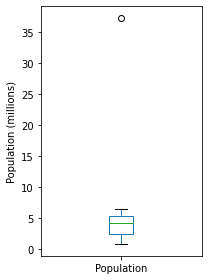

In [ ]:
# 코드는 내코드가 아니기 때문에 보지말고 출력문만 확인
import matplotlib.pyplot as plt
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

- 인구수가 높은 이상치가 있음을 한눈에 파악할 수 있다.
- 상자부분의 위쪽과 아래쪽은 각각 75%, 25% 백분위수를 나타낸다, 중간값은 상자안에 있는 굵은 수평선으로 표시한다.
- 이상치의 기준은 Q1 - (IQR x 1.5), Q3 + (IQR x 1.5) 이다.
- 구간의 크기는 다르지만 각 구간에 포함된 데이터의 수가 같다!(중요)

### 📈 도수분포표와 히스토그램
- 도수분포표는 변수의 범위를 **동일한 크기의 구간으로 나눈** 다음, 각 구간마다 몇개의 변숫값이 존재하는지를 보여주기 위해 사용된다.
- 도수분포표 예시

|키(cm)|명수|
|-|-|
|160cm 이하 |3명|
|160 ~ 165cm 이하|5명|
|165 ~ 170cm 이하|10명|

- cut함수를 사용하여 구간에 매핑할 수 있다. 이후 value_counts()메서들 랏용하여 빈도 테이블을 구한다.

In [ ]:
mapping = pd.cut(state['Population'],10)
mapping.value_counts()

(673687.275, 4364603.5]     4
(4364603.5, 8018976.0]      3
(33599583.5, 37253956.0]    1
(29945211.0, 33599583.5]    0
(26290838.5, 29945211.0]    0
(22636466.0, 26290838.5]    0
(18982093.5, 22636466.0]    0
(15327721.0, 18982093.5]    0
(11673348.5, 15327721.0]    0
(8018976.0, 11673348.5]     0
Name: Population, dtype: int64

- 빈구간이 생길 수 있는데 이는 중요한 정보가 될 수 있다.
- 구간의 크기를 바꿔보는 것도 유용한 정보를 얻는 좋은 방법이다. 
- 만약 크기가 너무 크면, 분포를 나타내는 중요한 특징을 놓칠 수 있다. 
- 반대로 너무 작아도, 결과가 너무 쪼개져 더 큰 그림을 볼 수 없게된다.

**( 중요!! : 도수분포표와 백분위수 모두 구간을 나눠서 데이터를 살펴보는 접근방법이다. 사분위수의 경우 같은 수의 데이터가 포함되도록, 즉 서로 크기가 다르게 구간을 나누는 것이며, 도수분포표는 구간의 크기가 같도록, 즉 구간안에 데이터의 수는 다를수 있다.)**

- 히스토그램은 바로 이 **도수분포표**를 식각화하는 방법이다. X축에는 구간들을 표시하고 y축에는 해당 구간별 데이터의 개수를 포함한다.
- python의 경우 histplot을 통해서 만들 수 있고 bins를 이용하여 구간의 수를 핸들링 할 수 있다.
- 히스토그램은 그래프에 빈구간이 있을 수 있으며, 구간은 도수분포표의 시각화방법이므로 동일하다, 또한 구간의 수는 사용자가 결정할 수 있으며, 막대들은 데이터가 비어있지 않는 한 붙어있다.

> **도수분포표 = 히스토그램**

>**백분위수 = 박스그림**



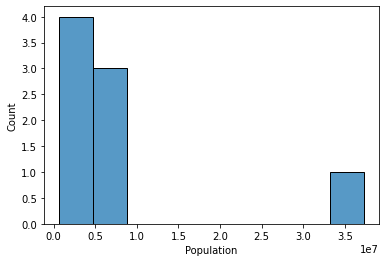

In [ ]:
import seaborn as sns
sns.histplot(state['Population'],bins = 9)

### 📈 밀도 그림과 추정
- 밀도그림의 경우 데이터의 분포를 연속된 선으로 보여준다. 즉, 히스토그램의 부드러운 버전이라고 볼 수 있다. 
- python에서는 histplot에서 파라미터로 density = True 를 넣어주면 완성하게 된다.
- 히스토그램과 이 밀도 그림과의 가장 큰 차이는 바로 y축 값의 단위입니다. 히스토그램과 다른게 밀도그림에서는 개수가 아닌 비율로 표시가 됩니다.

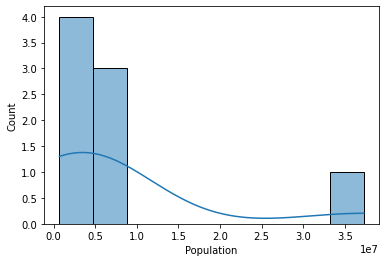

In [ ]:
import seaborn as sns
sns.histplot(state['Population'],bins = 9, kde = True)

## 💡이진 데이터와 범주 데이터 탐색

### 📈 용어 정리
- 최빈값(mode)  : 데이터에서 가장 자주 등장하는 범주 혹은 값
- 기댓값(expected value) : 범주에 해당하는 어떤 수치가 있을 떄, 범주의 출현 확률(probability)에 따른 평균
- 막대도표(bar chart) : 각 범주의 빈도수 혹은 비율을 막대로 나타낸 그림
- 파이그림(pie chart) : 각 범주의 빈도수 혹은 비율을 원의 부채꼴 모양으로 나타낸 그림

### 📈 막대도표(bar-chart)
- 어떤 범주형 자료를 보여줄 때 사용되며 **x축에 각각의 범주를 놓고, y축에 각 범주에 해당하는 횟수 혹은 비율등을 표시한다.**
- python에서 사용이 가능하다.
- 히스토그램과 다른점은 중간에 틈이 있어 서로 떨어져 있다는 점이다.
- 막대도표 대신 파이그림을 사용하기도 하지만, 통계나 데이터 시각화 전문가들은 파이그림이 시각적으로 효과적이지 않다는 이유로 잘 사용하지 않는다.

(수치형 데이터를 범주형 데이터로 변환해줌으로서 데이터의 복잡도를 줄여줄 수 있어서 자주 사용되기도 한다. 특히 데이터를 분석할때 피처들 사이의 관계를 알아보기위해 사용하기도 한다.)


### 📈 기댓값(expected value)
통계를 배우다 보면, 혹은 데이터 직군을 위해 공부를 하다보면 기대값(expected value)라는 말이 종종 나온다. 이 기댓값은 무엇을 의미하는것일까??

- 각 결과가 발생 확률을 곱하고 이 값들을 모두 더하는것이다. 예제로 살펴보자
- 한 서비스 이용료가 매달 30만원이고, 나머지 하나는 매달5만원이다. 영업 사원이 고객 명단을 확보하기 위해 무료 세미나를 진행하였다. 그 결과 참석자의 5%정도가 30만원 짜리 상품에, 15% 정도가 5만원 상품에 가입하고, 나머지 80%정도는 어느 것에도 가입하지 않을 것이라고 판단하였다. 상업적인 목적을 위해 이러한 정보에서 기댓값을 뽑아낼 수 있다. 가중치가 해당 확률이 되는 가중평균이 바로 기대값이다.
- Expected Value = (0.05)(300) + (0.15)(50) + (0.80)(0) = 22.5
- 기댓값은 실제 사업 평가나 자본 예산에 가장 근본적인 토대가 된다.


## 💡 상관관계

### 📈 상관관계

- 데이터 분석에 있어서 상관관계를 조사하는것은 빼놓을 수 없는 절차중 하나이다.
- X가 큰값을 가질 수록 Y도 큰값을 가지거나, X가 작은값을 가질때 Y도 점점 작은값을 가진다면 이를(X와Y는) 양의 상관관계를 가진다고 할 수 있다.
- 반대로 X가 큰값을 가질 수록 Y가 작은값을가지거나, 그 반대인 경우는 음의 상관관계를 갖는다고 한다.

### 📈 용어 정리
- 상관계수(correlation coefficient) : 수치적 변수들 간에 어떤 관계가 있는지를 나타내기 위해 사용되는 **측정량**( 이해가 안되면 바로 밑에 상관관계와 상관계수를 읽으면서보면 이해가 된다.)
- 상관행렬(correlation matrix) : 행과 열이 변수들을 의미하는 표를 말하며, 각 셀은 그 행과 열에 해당하는 변수들 간의 상관관계를 의미한다.(파이썬의 히트맵같은 느낌)
- 산점도(scatterplot) : x축과 y축이 서로 다른 두 개의 변수를 나타내는 도표

### 📈 상관관계와 상관계수
- 상관관계를 나타내는 상관계수는 **힘과 방향**을 의미한다.
- 먼저 상관계수는 -1 부터 1사이 이다.
- 상관계수가 -1 이면 완벽한 음의 상관관계를 가지는 것이다.
- 상관계수가 0 이면 아무런 관계가 없는 것이다.
- 상관계수가 +1 이면 완벽한 양의 상관관계를 가지는 것이다.
- +와 -는 방향이며, 힘은 상관계수의 크기 이다.
- 상관계수의 크기 절대값이 1에 가까워질 수록 센것이며, 0에 가까울 수록 약한것이다.


### 💼 힘이 세다는 것은 무엇일까??
- 산점도 그래프(scatterplot)을 그려봤을때 데이터 들이 서로 가깝게 모여있으면 힘이 센것이고
각각 멀리 떨어져있으면 상관관계가 약하기 때문에 0에 가깝다고 할 수 있다.
- 추가로, 데이터 들이 모여있는 점들의 모여있는정도가 상관관계인것이지 점이 모여있는것들의 각도는 상관관계랑 관련이없다.

### 💼 상관 관계 != 인과 관계

- 관계는 두 변수가 서로 관계가 있는지, 없는지에 대한 것이다.
- 관계는 원인과 결과를 가지는 변수의 결과성을 의미한다, 즉 한변수가 원인이고, 다른변수가 결과이다.


### 💼 피어슨의 상관계수
- 피어슨 상관계수를 계산하려면 변수 1과 변수2 각각의 평균으로부터의 편차들을 서로 곱한 값들의 평균을 각 변수의 표준편차의 곱으로 나눠준다.
- n이 아닌 n-1로 나누어 주는것을 기억하자

### 💼 주의사항
- 만약에 변수들이 선형적인 관계를 갖지 않을 경우 상관계수는 더 이상 유용한 지표가 아니다.

### 📈 상관관계 
- seaborn의 heatmap을 이용하여 상관관게를 시각화 할 수 있다.
- 평균과 표준편차와 같이, 상관계수는 데이터의 특잇값에 민감하다. 이러한 클래식한 상관계수를 대체할 수 있는 로버스트한 방법이 패키지로 존재하는데 사이킷런의 모듈 **sklearn.covariance** 이다.

## 💡두 개 이상의 변수 탐색하기

> **평균과 분산**과 같이 익숙한 추정값들은 한 번에 하나의 변수를 다룬다(**일변량 분석**), **상관분석**은 두 변수(이변량 분석)를 비교할 때 중요한 방법이다. 이번에는 이에 관한 추정법과 도표를 살펴보고 셋 이상의 변수(**다변량분석**)을 다루는 방법을 살펴볼 것이다. 

### 📈 용어정리
- 분할표(contingency table) : 두 가지 이상의 범주형 변수의 빈도수를 기록한 표
- 육각형 구간 : 두 변수를 육각형 모양의 구간으로 나눈 그림
- 등고 도표(contour plot) : 지도상에 같은 높이의 지점을 등고선으로 나타내는 것처럼, 두 변수의 밀도를 등고선으로 표시한 도표
- 바이올린 도표(violin plot) : 상자그림과 비슷하지만 밀도추정을 함께 보여준다.

### 📈 육각형 구간과 등고선(수치형 변수 대 수치형 변수 시각화)
- 산점도(scatter)의 경우 데이터 개수가 상대적으로 적을 때는 시각화 하기 좋다. 하지만 수십, 수백만의 레코드를 나타내기에 점들이 너무 밀집되어 알아보기 어렵다. 따라서 이를 보완하기 위해 나온것이 육각형 구간이다.
- 육각형 구간은 점으로 표시하는 대신 기록값을 육각형 모양의 구간들로 나누고 각 구간에 포함된 기록값의 개수에 따라 색깔로 표시한다.
- 이렇게 함으로서 상관관계도 파악할 수 있고 밀집의 정도역시 파악하기에 용이하다.
- python의 경우 hexbinplot을 이용하여 만들 수 있고 다음과 같은 형태이다.

In [ ]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

NameError: ignored

In [ ]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

- 두 수치형 변수사이의 관계를 시각화 하기위해 두번째로 산점도 위에 등고선을 사용할 수 있다.
- seabron의 kdeplot함수를 이용해서 가능하다.

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

### 📈 범주형 변수 대 수치형 변수
- 상자그림은 범주형 변수에 따라 분류된 수치형 변수의 분포를 시각화하여 비교하는 간단한 방법이다. 하지만 이 상자그림을 더욱 보완한 형태인 바이올림 도표가 있다.
- 바이올린 도표는 y축을 따라 밀도추정 결과를 동시에 시각화 한것이다. 즉, 상자그림에서 보이지 않은 **데이터의 분포를 볼 수 있다**는 것이다.
- seaborn의 violinplot메서드를 통해 시각화 할 수 있다.
- geom_boxplot함수를 추가한다면 바이올린 도표에 상자그림을 결합할 수 있다.

In [ ]:
# Table 1-8(1)
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)


# Table 1-8(2)
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

### 📈 다변수 시각화하기
- python의 facetgrid를 통해 다변수를 시각화 할 수 있다.

In [ ]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()

# CH2. 데이터와 표본분포


## 💡 표본추출과 편향


### 📈 용어 정리
- N(n) : 모집단(표본)의 크기
- 임의표본추출(random sampling) : 무작위로 표본을 추출하는 것
- 층화표본추출(stratified sampling) : 모집단을 층으로 나눈 뒤, 각 층에서 무작위로 표본을 추출하는것(중복되지 않은 층, 예를 들어 대한민국의 ~~한 평균을 구한다고 했을때 지역별로 층을 나누는것)
- 계층 : 공통된 특징을 가진 모집단의 동종 하위 그룹
- 단순임의표본 : 모집단의 층화 없이 임의표본추출로 얻은 표본
- 편향 : 계통상의 오류
- 표본편향 : 모집단을 잘못 대표하는 표본

> **자기선택 표본편향** : 카페나 레스토랑의 리뷰데이터는 무작위로 선정된 것이 아니기 때문에 편향이 되기 쉽다. 예를들어 호텔같은 경우 리뷰를 남긴 사람의 경우 아닌사람들과 달리 특별한 좋은 혹은 나쁜 경험을 했거나, 리뷰어 혹은 체험단의 성격을 지닐 수 있기 때문이다. 이는 표본자체가 편향이 있으며 해당 호텔을 파악하기 위한 지표로서 사용하기에는 어려울 수 있따. 하지만 단순히 시설간의 비교를 할때에는 오히려 신뢰할 만한 자료가 될 수 있다.


### 📈 편향
- 통계적 편향은 측정 과정 혹은 표본추출 과정에서 발생하는 계통적인 오차를 의미한다.
- 통계적 추정결과가 체계적으로 한 쪽으로 치우치는 경향을 보임으로서 발생하는 오차.
- 추정결과가 크거나 작아짐에 따라 발생하는 변동오차와는 달리, 추정결과가 한 쪽 방향으로 치우침에 따라 나타나는 오차이다.
- **임의표본추출로 인한 오류와 편향에 따른 오류는 신중하게 구분해야한다.**




### 📈 표본평균과 모평균
![](https://images.velog.io/images/ljs7463/post/b924e802-8e50-45a0-8517-d946f2ea6825/bandicam%202021-08-06%2016-57-43-980.jpg)
-  위에 있는 기호를 **모집단의 표본평균**의 기호이며 **모집단의 평균은 U**로 표현한다. 
- 이 둘을 구분하는 이유는 표본에 대한 정보는 관찰을 통해 얻어지고, 모집단에 대한 정보는 주로 작은 표본들로부터 추론을 하기때문에 통계학자들은 구분하는것을 선호한다.


### 📈 선택편향(select bias)
- 선택편향은 데이터를 **의식적이든 무의식적이든 선택적으로 고르는 관행**을 뜻한다.(관측 데이터를 선택하는 방식 때문에 생기는 편향)
- 이는 오해의 소지가 있거나 단편적인 결론으로 향한다.
- 비무작위 표본을 마치 무작위 표본인 것처럼 생각하고 사용할 때 발생하는 오류를 뜻한다.
- 쉽게 생각해보면 모아둔 자료들이 랜덤하다고 착각하는것이다.
- 다른 예를들어 보면 시장에 바나나를 사러갔는데 수 많은 바나나중 대충 두, 세개를 골랐더니 신선해 보여서 구매를 했더니 세개 모두 신선했을때는 다른것들도 신선할 것이라고 예측한다.
- 하지만, 본인이 선택해서 확인한 것이 아닌 과일가게 주인이 두,세개를 보여주는 경우 장사를 하는 입장에서 일부로 좋은상품을 표본으로서 보여줬을 가능성이 있다.
- 이러한 경우 가게 주인의 작위성이 들어가고 신뢰가 떨어지게 된다.
- 선택편항에는 등장하는 두가지 개념이 있다. **"데이터 스누핑"과 "방대한 검색 효과" **이다.

#### 📈 방대한 검색효과 (Vast search effects)
- 데이터 과학자들이 걱정하는 선택편향의 한 형태는 존 엘더가 부르는 **방대한 검색효과이다.**
- 큰 데이터 집합을 가지고 반복적으로 다른 모델을 만들고 다른 질문을 하다 보면, 언젠가 흥미로운 것을 발견하기 마련이다. 그 결과는 정말로 의미가 있는 것인가? 아니면 우연히 얻은 예외 인가?
- 많은 예측 변수를 포함하는 모델링은 일반화가 될 수 있을까??
- 예를 들어 내가 복권에 당첨 될 확률은 희박할것이다. 하지만 백만명이 복권을 샀을때 그 중 한명이 복권에 당첨 될 확률은?? 매우 높을것이다
- 즉, 데이터를 고문하다보면 어떤 형태로든 자백하게 되는데 과연 이것이 의미있는것일까? 아니면 우연일까?? 
- 따라서 성능을 검증하기 위해서 **홀드아웃(holdout)데이터 세트를 사용하거나, 목표값섞기(순열검정)을 추천했다**(존 엘더John Elder < 데이터 마이닝 컨설턴트이자 엘더 리서치의 설립자이다. > )
- 통계에서 일반적으로 나타나는 선택편향으로는 위에서 언급한 **방대한 검색효과** 뿐만 아니라, **비임의표본추출(non-random-sampling)**, **데이터 체리피킹(선택)**, **특정한 통계적 효과를 강조하는 시간 구간 선택**, **흥미로운 결과가 나올때 실험을 중단하는 것** 등이 포함된다. 


#### 📈 데이터 스누핑
- 어떠한 가설을 세우고 그것을 시험하기 위해서 잘 설계된 실험을 수행한다면, 그 결과에 대해 강하게 확신할 수 있다. 하지만 이런 경우는 드물다. 
- 보통 가지고 있는 데이터를 먼저 확인한 후 그 안에서 패턴을 찾고자 한다. 하지만, 이것이 참된 패턴인지 그냥 데이터 스누핑을 통해 나온 결과인지 알 수없다.
- 즉, 데이터 스누핑이란 흥미로운것이 나올때까지 계속해서 데이터를 뒤지는것이다. 
- 모델에 환벽히 들어 맞는 패턴이나 규칙을 계속해서 찾는것, 우리는 데이터를 계속해서 고문하다보면 모델에 들어맞는 패턴을 찾는경우가 있지만 이것이 유의미한 패턴인지는 의문이다.

### 📈 평균으로의 회귀

- 주어진 어떤 변수를 연속적으로 측정했을 때 나타는 현상으로서
- 예외적인 경우가 관찰되면 그 다음에는 중간 정도의 경우가 관찰되는 경향이 있다는 것이다. 따라서 예외 경우를 너무 특별히 생각하고 의미를 부여하면 선택편향으로 이어질 수 있다.
- 예를 들어, 야구 선수가 새로운 팀으로 이적을 했다고 가정하자.
- 해당 시즌에 성적은 간단하게 다음과 같은 공식이 적용할것이다.
- 성적 = 실력 + 운
- 물론 실제로 다양한 복합적인 요소가 있겠지만 예시를 위해 이렇게 예를 들어보았다.
- 실력이 10중에 5인 선수이지만 그 해 운이 좋아서 10의 성적을 보여줬다고 하면 이것은 평소 5점의 실력과 다르게 예외값으로 계산이 된다. 그렇다고 해서 이 경우에 너무 의미 부여를 하다가는 선택편향이 발생할 수 있다. 
- 예외가 발생하였다고 성급하게 어떠한 판단을 하기보다는 데이터를 전체적으로 바라보자!!


### 📈 정리
- 가설을 구체적으로 명시하고 임의표본추출 원칙에 따라 데이터를 수집하면 편향을 피할 수 있다.
- 모든 형태의 데이터 분석은 데이터수집/분석 프로세스에서 생기는 편향의 위험성을 늘 가지고 있다.

## 💡표준오차 표준편차

> 통계의 표본분포라는 용어는 하나의 동일한 모집단에서 얻은 여러 샘플에 대한 표본통계량의 분포를 나타낸다.

### 📈 용어정리
- 표본통계량(sample statistic) : 더 큰 모집단에서 추출도니 표본 데이터들로부터 얻은 측정 지표
- 데이터 분포(data distribution) : 어떤 데이터 집합에서의 각 개별 값의 도수분포(통계학에서 도수분포 또는 빈도분포는 표본의 다양한 산출 분포를 보여준다.)
- 표본분포(sampling distribution) : 여러 표본들 혹은 재표본들로부터 얻은 표본 통계량의 도수분포
- 중심극한정리(central limit theorem, CLT) : 표본크기가 커질수록 표본분포가 정규분포를 따르는 경향
- 표준오차(standard error) : 여러 표본들로부터 얻은 표본통계량의 변량(개별 데이터 값들의 변량을 뜻하는 표준편차와 혼동하지 말 것)

> 우리는 표본을 통해서 추정이나 모델을 하기 때문에 어떤 표본을 뽑느냐에 따라 결과가 달라질 수 있다. 즉, 표본의 변동성(sampling variability)이 관심사이다.




### 📈 표준 편차 
- 표준편차는 각 데이터가 평균과 얼마나 차이를 가지느냐를 알려주는 것이다.


### 📈 표준 오차
- 표준오차는 표본평균의 표준편차이다.
- 표준오차는 추정량의 정도를 나타내는 측도로서 샘플링을 여러 번 했을 때 각 샘플들의 평균이 전체 평균과 얼마나 차이를 보내는지에 대한 통계량이다.
- 즉, 표본이 모집단에서 얼마나 떨어져 있는가를 나타낸다.(표준오차가 작을수록 표본의 대표성이 높다고 할 수 있다.)
![](https://images.velog.io/images/ljs7463/post/0f0ded8e-545b-4731-8fcb-a4f0ccf91103/bandicam%202021-08-13%2013-45-00-694.jpg)
- 표준오차는 표본 값들의 표준편차s와 표본크기 n을 기반으로 한 통계량을 이용하여 추정할 수 있다.
- 위의 수식을 보면 알 수 있듯이 표본의 크기가 커지면 표준오차는 줄어든다.
- 이때 표준오차와 표본크기 사이의 관계를 **n제곱근의 법칙**이라고 부르기도 한다.(표준오차를 2배로 줄이려면 표본 크기를 4배를 증가시켜야한다.)
- 표준오차는 표본의 크기가 커질수록 줄어든다.


정리하면, 표준편차의 경우 하나의 표본안에서 각 데이터들이 그들의 평균과 얼마나 떨어져 있는지를 나타낸 것이며, 표준오차는 여러 표본들을 샘플링(sampling)을 하고 각 샘플들의 평균이 전체 모집단의 평균과 얼마나 차이가 나는지를 보여주는것으로 모집단과의 차이가 적을수록 표본이 모집단을 잘 대표하고 있는 샘플이라고 할 수 있다.

### 📈 표준오차를 측정할 때 고려해야할 사항
- 모집단에서 완전히 새로운 샘플들을 많이 수집한다.
- 각각의 새 샘플에 대해 통계량(ex)평균)을 계산한다.
- 두 번째 에서 얻은 통계량의 표준편차를 계산한다. 이를 표준오차의 추정치로 사용한다.

하지만, 실제로 표준오차를 추정하기 위해서 새 샘플을 수집하는 접근 방식은 일반적으로 불가능하다(통계적 낭비 심하다). 하지만 이는 **부트스트랩** 재표본을 사용할 수 있다. 

부트스트랩은 다음 포스팅에서 다루어보고자 한다.

### 📈 정리
표준오차는 표본평균의 표준편차이다. 내가 뽑은 표본이 모집단을 얼마나 잘 반영했는지를 알아보기 위해 표준오차를 측정하는데 표본들을 무작정 늘릴수 없으니 부트스트랩 방법을 활용하여 표본을 늘린다.

## 💡 복원추출과 비복원추출

```
복원추출과 비복원추출을 '대충' 알고 있는경우가 많은것 같다.
겉할기 식으로 단어로 부터 추정하는 식으로 익혔다면 이번에 정확한 의미로
익혔으면 좋겠다. 물론 나또한 이번 게시물에서 자랑할만큼의 잘 알고있는것이 아니고
수많은 구글의 게시글들을 찾아보며 알게 된것을 공유할 뿐이다.
```

먼저 다음에 질문해보는것이 잘 알고있는지 아닌지 확인해볼 수 있을것 같다.
```
* 먼저 모집단이 있다고 가정한다.

1. 모집단에서 5개의 원소를 한번에 뽑고 A라는 표본으로 한다. 그리고 표본 A를 다시 
모집단에 넣은 후 전체 모집단에서 5개의 원소를 한번 더 뽑고 B라는 표본으로 정의한다.

2. 모집단에서 5개의 원소를 한번에 뽑고 A라는 표본으로 한다. 그리고 모집단으로 다시 집어넣지 않고 모집단에서 5개의 원소를 뽑아서 B라는 표본으로한다.

3. 모집단에서 5개의 원소를 뽑는데 하나를 뽑을때마다 모집단에 돌려놓고 다시 뽑으면서 총 5개를 뽑고 표본 A라고 한다. 해당 과정을 한번 더 반복하고 표본 B라고 한다.
```

다음 3개의 경우의 수 를 보았을때 어떤것이 복원추출이고 어떤것이 비복원추출에 해당하는 것일까??

1번이 복원추출 2번이 비복원추출이라고 생각하시는 분들이 분명히 있을것이다.
하지만 복원추출은 3번이다!!

### 📈 복원추출 
크기가 n개인 표본을 뽑는데, n개의 원소를 하나씩뽑는데, 원소를 하나 뽑을 때마다 복원하고, 다음 원소를 뽑는다

### 📈 비복원추출
크기가 n개인 표본을 뽑는데, n개의 원소를 하나씩 뽑는데, 뽑을 때 마다 복원하지 않고 다음 원소를 뽑는다.



### 📈 정리
즉, 각각의 원소 하나를 뽑을때마다 복원을 하는지, 하지 않는지가 복원추출이냐, 비복원추출이냐를 구분하게 된다.

## 💡 중심극한정리 와 재표본추출

### 📈 중심극한정리(Central Limit Theorem, CLT)

**모집단이 정규분포가 아니더라도**, 표본의 크기가 충분하고 데이터가 정규성을 크게 이탈하지 않는 경우, 여러 표본에서 추출한 평균은 종모양의 정규곡선을 따른다.

- 표본이 아무리 많다고 해도 표본의 평균값이 모집단의 평균값과 같아지지는 않는다.(표본 추출을 할때마다 표본의 평균값이 달라지기 때문)
- 모집단의 평균값과같아질수는 없지만 표본의 크기가 커질수록(30개 이상) 표본평균들이 이루는 분포가 정규분포에 가까워진다.
- "모집단의 분포에 상관없이" 큰 표본들의 표본평균의 분포가 정규분포로 수렴 한다는 점을 이용하여, Z값을 구해 확률값을 구할 수 있게 된다.
- 중심극한정리는 가설검정과 신뢰구간의 밑바탕이 되므로 매우 중요하게 다루어진다. 하지만, 형식적인 가설검정이나 신뢰구간이 데이터 과학에서는 그정도로 중요하지않다.
- 대부분의 경우 부트스트랩을 사용할 수 있기 때문이다.

### 📈 재표본추출,Resampling(부트스트래핑, 순열검정)

- 재표본 추출은 부트스트랩과 비슷한의미로 사용된다. 보통 재표본추출은 여러 표본이 결합되어 비복원추출을 수행할 수 있는 "순열과정"을 포함한다. 부트스트랩은 항상 관측된 데이터로부터 복원추출은 하는것이다.

- 통계학에서 재표본추출의 목표는 랜덤한 변동성을 알아보기 위함이다. 재표본추출은 표본을 반복적으로 추출하는것을 의미하며, 이를 적용하면 머신러닝 모델의 정확성을 평가하고, 항샹시킬 수 있다.


### 📈 부트스트랩(bootstrap)

- 통계량이나 모델 파라미터(모수)의 표본분포를 추정하는 쉽고 효과적인 방법은, 현재 있는 표본에서 추가적으로 표본을 복원추출하고 각 표본에 대한 통계량과 모델을 다시 계산하는 것이다. 이러한 절차를 부트스트랩이라고 부르며, 데이터나 표본통계량이 정규분포를 따라야 한다는 가정은 꼭 필요하지 않다.
- **부트스트랩을 사용 하는이유는 모집단에서 추출한 샘플이 이상치들만 가져올수도 있다. 즉, 가져온 샘플이 모집단을 대표할 수 있는 데이터인지 모르기 때문에 부트스트랩을 통해 반복추출을 해서 모집단과 최대한 가까운 샘플을 만들어서 최적의 샘플로 좋은성능을 내기위함.**

- 부트스트래핑을 하면 한 개 밖에 없었던 우리의 sample data set을 n개의 sample data set을 가지고 있는것과 같은 효과를 누릴 수 있게 한다.
- 부트스트래핑은 정규분포를 따르지않고, 데이터셋의 분포가 고르지 않은경우에 사용할 수 있다는 장점이 있다.
- 방법 : 모집단에서 하나의 샘플데이터를 뽑아온다 -> 샘플데이터에서 복원추출하여 반복해서 샘플을만든다.
-> 재표본추출된 표본의 평균을 기록한다. -> 이를 반복한다.(중복허용=복원추출)
- 반복횟수가 많을수록 표준오차나 신뢰구간에 대한 추정이 더 정확해진다.

- 부트스트래핑을 사용하는 이유는 많은 통계적 실험에서는 정규성을 가정하고 사용을 하게된다. 부트스트래핑을 이용하게되면 적은 데이터라도 정규분포를 형성시키기 충분한 데이터를 만들 수 있기 때문에 모집단의 평균을 추정할 수 있다.
- 즉, 자료가 충분하지 않을때는, 부트스트래핑을 통해 데이터를 일시적으로 늘여서 표준오차를 통해 표본의 변동성을 측정한다.
- 1개의 샘플평균은 별로 의미가 없지만 1000개 이상 부트스트래핑한 평균은 모집단의 평균을 추정가능.
- 여러 부트스트랩 표본들로부터 얻은 예측값을 모아서 결론을 만드는것(배깅)이 단일 모델을 사용하는것 보다 좋다.
- **부트스트랩은 표본크기가 작은 것을 보완하기 위한것이 아니다. 새 데이터를 만드는 것도 아니며 기존 데이터 집합의 빈 곳을 채우는것도 아니다. 모집단에서 추가적으로 표본을 뽑는다고 할 때, 그 표본이 얼마나 원래 표본과 비슷할지를 알려줄 뿐이다.**

In [ ]:
from sklearn.utils import resample
results = []
for nrepeat in range(1000):
  sample = resample(loans_income)
  results.append(sample.median())

results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original:{loans_income.median()}')
print(f'bias : {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

In [ ]:
import seaborn as sns
sns.histplot(loans_income)

### 📈 순열검정(permutation test)

- 무작위 순열검정 : 두 개 이상의 표본을 함께 결합하여 관측값들을 무작위로 재표본으로 추출하는과정
- 과정
1. 여러 그룹의 결과를 단일 데이터 집합으로 결합한다.
2. 결합된 데이터를 잘 섞은 후, 그룹A와 동일한 크기의 표본을 무작위로 (비복원)추출한다.
3. 나머지 데이터에서 그룹 B와 동일한 크기의 샘플을 무작위로 (비복원)추출한다.
4. 지금 추출한 재표본에 대해 모두 다시 계산하고 기록한다.
5. 1 ~ 4 의 과정을 R번 반복하여 검정통계량의 순열 분포를 얻는다.

-기존 그룹의 차이와 순열 과정에서 얻은 집합의 차이를 비교해보자.
만약, 기존 차이가 순열로 나온 차이의 집합 안에 들어가 있다면 어떠한 것도 증명할 수가 없다.( 우연히 일어날 수 있음 )하지만, 기존 차이가 순열 분포의 바깥에 있다면, 우연 때문이 아니라고 결론 내릴 수 있다.
즉, 통계적으로 유의미하다.

#### 📈 순열검정의 변종 

1. 전체순열검정 : 데이터를 무작위로 섞고 나누는 과정에서 나눌 수 있는 모든 가능한 조합을 찾는다.
따라서 샘플 크기가 비교적 작을 때만 실용적이다. 셔플링을 많이 반복할수록, 임의순열검정 결과는 전체순열검정 결과와 유사하게 근접한다. '유의미하다'라는 결론이 아닌 더 정확한 결론을 보장하는 통계적 속성이 있어서 '정확검정'이라고도 한다.

 
 

2. 부트스트랩 순열검정 : 무작위 순열검정의 2,3단계에서 비복원으로 하던 것을 복원 추출로 수행한다.
이는 리샘플링 과정에서 모집단 개체를 선택할 때, 개체가 다시 그룹에 할당될 때에도 임의성을 보장한다.
하지만, 이를 구별하는 일이 복잡하고, 데이터 과학에서 별로 실용적이지 않다.

## 💡 신뢰구간(Confidence interval)

### 📈 들어가기 앞서
사람들은 불확실성에 대해 자연스러운 반감을 가지고 있는경우가 많다. 특히 전문가들은 '잘 모른다'와 같은 표현을 사용하는 것을 꺼려한다. 사람들은 불확실성을 인정하면서도, 그것이 어떤 단일 수치(점추정)로 제시될때, 추정치에 대한 과도한 믿을을 가진다. 이때 단일 수치가 아닌 어떠한 범위로서 추정치를 제시함으로서 이러한 경향을 막을 수 있다. 이것이 신뢰구간을 표현하는 이유중 하나일 것이다. 먼저, 신뢰구간은 통계적 샘플링에 근거한다.

### 📈 신뢰구간(Confidence interval)
#### 📈 95% 신뢰구간이란?
100번의 반복 샘플링을 통해 얻은 평균과 편차로 계산한 100개의 신뢰구간중 5개는 실제로 모평균(u,뮤)을 포함하고 있지않는다, 혹은 표본을 통해 얻은 95% 신뢰구간에 실제 모평균이 포함되지 않을 확률이 5%이다. 

이때, 95%를 신뢰수준(Confidence Level)이라고 하고 "신뢰수준이 95%이다."라고 말할 수 있다.

> 신뢰구간이란 모수의 참값이 추정한 구간 안에 포함될 것으로 믿어지는 미리 정해놓은 확신의 정도를 신뢰수준(Confidence Level)이라 한다.

![](https://images.velog.io/images/ljs7463/post/07a11b85-a255-4b4c-9ced-76b84debe05c/%EC%8B%A0%EB%A2%B0%EA%B5%AC%EA%B0%84.jpg)

신뢰구간에 대해 그림을 그려보면 위와 같은 모습이다.

이해를 돕기 위해 예시를 하나 들어보고자 한다. 대한민국 남성의 키의 평균을 구해보고자 한다. 하지만 모집단인 대한민국 성인 남성의 키를 모두 측정하는 것은 불가능 하기때문에 여러가지 sampling방법중 하나를 사용하여 sample을 구해서 대표 해보고자 한다. 

특별시, 광역시 에서 100명의 성인 남성들을 뽑아 측정한 결과 평균이 170 ~ 180 이라는 결과가 나왔다고 한다. 하지만 sample로 뽑힌 성인 남성 중에서는 195 cm의 키를 보유한 남성도 있을것이다. 반대로 150cm인 남성또한 존재할 수 있다. 이때 신뢰구간을 95%를 잡았다는것은 모든 샘플데이터에서 95%는 포함이 되고 5%는 포함이 되지않는다는 것을 말한다. 

150cm, 195cm와 같이 한쪽으로 많이 치우친 값들의 경우 5%에 포함될 확률이 높은것이다. 이는 실제로 sampling을 해봐야 알겠지만 임의로 잡은 평균이 170~180 이라고 가정했을때 150cm과 195cm의 경우를 5%라고 가정해보자.

위의 예시에서 정한 95%의 범위안에 든다면 통계적으로 유의하다고 말할 수 있는 수치이며, 양쪽의 총 5%의 구간은 통계적으로 유의하지 않을 확률이 높다라고 말할 수 있다.

### 📈 표본의 크기와 신뢰수준의 관계

만약에 표본을 각 특별시, 광역시에서 10명의 사람을 뽑아서 키의 평균이 170 ~172cm가 나왔다고 가정을 해보자. 과연 믿음직 할까?? 별로 믿음직하지 않을것이다. 그런데 만약 50명씩 뽑아서 165에서 175가 나왔다고 해보자. 이것은 좀 더 믿음직하다. 그렇다면 마지막으로 10명씩 뽑아서 키의 평균이 150 ~ 190 이라고 하면 어떨까요?? 이것은 훨씬 믿음직 할 것입니다. 하지만 이것은 정보량이 없습니다. 따라서 우리는 구간을 줄이고 싶을것입니다.

구간을 줄이려면 샘플사이즈를 늘려야지 가능하다. 즉 우리가 165 ~ 175라고 말하고 싶으면 표본의 크기를 100명, 200명, 300명 이렇게 늘려야한다. 즉, 표본크기는 신뢰수준과 밀접한 관계가 있는 것이다. 

신뢰수준의 개념을 예시로 한번 더 이해해보자!! 우리가 여론조사를 했다고 가정해 보자.
A후보의 지지율이 40%이고 ±3%라고 하자. 그렇다면 A후보의 실제 지지율이 37% ~ 43%사이에 놓여있을것입니다. 그런데 이것이 항상 성립하는것이 아니라 이러한 여론조사를 **백번, 천번, 만번 반복했을때** 95번은 참값을 포함할것이고 5번은 틀릴 수 있을것이다 라고 했을때 신뢰수준이 95%이다 라고 할 수 있다. 여기서 5번의 예로는 해당 지지자를 싫어하는 사람들이 sample에 많이 들어갔을 수도 있는 경우를 말한다.따라서 샘플 사이즈를 늘려야 신뢰수준을 늘릴 수 있는것이다. 

정리해보면 신뢰수준이 95%라고 동일했을때, 샘플수가 많으면 키의 평균이 165 ~ 175cm라고 이야기 할 수 있지만 샘플수가 10명을 조사한것이라면 150 ~195cm구간으로 늘릴 수 밖에 없는것이다./ 표본이 작을수록 구간이 넓어진다(즉, 불확실성이 더 커진다)

### 📈 표본크기 N과 관심있는 표본 통계량이 주어졌을때, 부트스트랩 신뢰구간을 구하는 방법
1. 데이터에서 복원추출 방식으로 크기 n인 표본을 뽑는다(재표본추출)
2. 재표본추출한 표본에 대해 원하는 통계량을 기록한다.
3. 1 ~ 2 단계를 R번 반복한다.
4. x% 신뢰구간을 구하기 위해, R개의 재표본 결과의 분포 양쪽 끝에서 [(100 - x)/2] % 만큼 잘라낸다.
5. 절단한 점들은 x% 부트스트랩 신뢰구간의 양 끝점이다.

>부트스트랩은 대부분의 통계량 혹은 모델 파라미터에 대한 신뢰구간을 생성하는 데 사용할 수 있는 일반적인 기법이다.


## 💡 대표값의 함정

### 📈 앤스컴 콰르텟

기술통계에서는 많은 대표값들이 존재한다. 하지만, 이 대표값으로만 의미를 뽑아내려다 보면 전체적인 그림을 보지 못할 수 있습니다. 이를 설명하는데 대표적인 것이 **앤스컴 콰르텟** 입니다.


앤스컴 콰르텟이란 통계학자가 발견한 네 개의 데이터셋을 뜻한다. 
실제로 코렙으로 만들어 보았다.

```python
# 데이터 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('anscombe')  

data1 = df[df['dataset']=='I']
data2 = df[df['dataset']=='II']
data3 = df[df['dataset']=='III']
data4 = df[df['dataset']=='IV']

print(data1.describe())
print(data2.describe())
print(data3.describe())
print(data4.describe())
```
```python
>>> 출력
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000   8.190000
max    19.000000  12.500000
```
출력된 정보를 보았을때는 4개의 데이터 셋이 모두 비슷해보인데 하지만 이를 regplot으로 시각화 해보겠다.
```python
# 시간이 없어 지저분하지만 하나하나 만들었다.

fig, ax =plt.subplots(2,2,figsize =(12,6))

sns.regplot(
    data=data1,
    x='x',
    y='y',
    ax = ax[0,0]
    )
    
sns.regplot(
    data=data2,
    x='x',
    y='y',
    ax = ax[0,1]
    )
    
sns.regplot(
    data=data3,
    x='x',
    y='y',
    ax = ax[1,0]
    )
    
sns.regplot(
    data=data4,
    x='x',
    y='y',
    ax = ax[1,1]
    )
    
plt.show()

```
![](https://images.velog.io/images/ljs7463/post/48d6e302-dd85-44a3-93fb-c364023b5614/image.png)

출력 결과는 위의 그림과 같다. 

보는것처럼 4개가 전부 다르다는것을 알 수 있다. 충격적인 결과이다.

이를 보고 대표값에 맹신하여 과도한 집착은 오히려 함정에 빠질 수 있다는 교훈을 남겨주었다.




## 💡 정규분포

### 📈 용어정리
- 오차 : 데이터 포인트와 예측값 혹은 평균 사이의 차이
- 표준화(정규화)하다 : 평균을 빼고 표준편차로 나눈다.
- z 점수(z-score)  : 개별 데이터 포인트를 정규화한 결과
- 표준정규분포(standard normal distribution) : 평균 = 0, 표준편차 =1인 정규분포
- QQ그림 : 표본분포가 특정 분포(예 : 정규분포)에 얼마나 가까운지를 보여주는 그림


### 📈 정규분포

- 종 모양의 정규분포는 전통적인 통계의 상징이다. 표본통계량 분포가 보통 어떤 일정한 모양이 있다는 사실은 이 분포를 근사화하는 수학 공식을 개발하는 데 강력한 도구가 되었다. 

### 📈 정규화와 표준화

<정규화>
- 데이터 분포를 특정 구간으로 바꾸는 척도법이다.(0~1, -1~1)
- 데이터 군 내에서 특정 데이터가 가지는 위치를 볼때 사용된다.
- 식 = (측정값 - 최소값) / (최대값 - 최소값)

<표준화>
- 데이터를 0을(평균) 중심으로 양쪽으로 데이터를 분포시키는 방법(표준화를 하게 되면 각 데이터들은 평균을 기준으로 얼마나 떨어져 있는지를 나타내는 값으로 변환된다)
- 평균0 표준편차가 1
- 식(z-score표준화) : (측정값 - 평균) / (표준편차)

### 📈 표준정규분포와 QQ-plot(QQ그림)
- 표준정규분포는 x축의 단위가 평균의 표준편차로 표현되는 정규분포를 말한다. 데이터를 표준정규분포와 비교하려면 데이터에서 평균을 뺀 다음 표준편차로 나누면 된다(표준화). 그리고 이렇게 변환된 값을 Z-score 라고 하며, 정규분포를 z분포 라고 한다.
- QQ그림은 표본이 특정분포(예 : 정규분포)에 얼마나 가까운 형태인지 시각적으로 확인하기 위해서 사용된다. 
- z-score를 오름차순으로 정렬후 각 값의 z-score를 y축에 표시하고 정규분포에서의 해당 분위수를 x축에 표시한다. 
- 점들이 대략 대각선 위에 놓인다면 표본분포가 정규분포에 가까운것으로 간주할 수 있다.
- python에서는 scipy.stats.probplot을 통해 QQ-plot을 만들 수 있다.

In [ ]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize = (4, 4))
norm_sample = stats.norm.rvs(size = 100)
stats.probplot(norm_sample, plot = ax)

** 주의할점 **
데이터를 z-score로 변환(즉, 데이터를 표준화 또는 정규화)한다고 해서 데이터가 정규분포가 되는 것은 아니다. 단지 비교를 목적으로 데이털르 표준정규분포와 같은 척도로 만드는 것 뿐이다.

## 💡 스튜던트의 t분포

### 📈 용어정리
- n : 표본크기
- 자유도 : 다른 표본크기, 통계량, 그룹의 수에 따라 t분포를 조절하는 변수


### 📈 스튜던트의 t분포
- t분포는 정규분포와 생김새가 비슷하지만, 꼬리 부분이 약간 더 두껍고 길다. **t분포는 표본통계량의 분포**를 설명하는 데 광범위하게 사용된다. 표본 평균의 분포는 일반적으로 t분포와 같은 모양이며, 표본크기에 따라 다른 계열의 t분포가 있다. **표본이 클수록 더 정규분포를 닮은 t분포가 형성된다.**

- x축에 표준화된 결과(z-score)를, y축에 빈도를 나타내는 도표를 만들었다.
- 신뢰구간이 90% 일때 t분포의 양쪽 끝에서 5%를 잘라내는 t통계량을 의미한다.
- **표본평균**, **두 표본평균간의 차이**, **회귀 파라미터**, 그 외 다른 통계량들의 분포를 구할 때  t분포를 사용한다.
- 표본통계량의 상태를 묘사할 때 t 분포의 정확도는 표본에 대한 통계량의 분포가 정규분포를 따른다는 조건을 필요로 한다. 
- 원래 모집단이 정규분포를 따르지 않을 때 조차도, 표본통계량은 보통 정규분포를 따르는 것으로 나타났다(t분포가 널리 적용되는 이유)
- 이는 중심극한정리로 인해 그렇다.

## 💡 이항분포

### 📈 용어 정리
- 시행(trial) : 독립된 결과를 가져오는 하나의 사건(예 : 동전던지기)
- 이항식(binomial) : 두 가지 결과를 갖는다.
- 이항시행(binomial trial) : 두 가지 결과를 가져오는 시행
- 이항분포(binomial distribution) : n번 시행에서 성공한 횟수에 대한 분포


### 📈 이항분포란
- 이항식(예/아니오)의 결론은 **구매 혹은 구매하지 않음**, **클릭 혹은 클릭하지 않음**, **생존 혹은 사망** 등과 같이 의사결정에 있어서 중요한 역할을 하므로, 분석에서 핵심이라고 할 수 있다.

- 이항분포의 핵심은 시행(trial)에 있는데, 각각의 시행은 정해진 확률로 두 가지 결과를 갖는다.

- 예를들어 동전던지기를 10번을 시행(trial)하는 것은 2가지 결과(앞면 혹은 뒷면)를 갖는 시행을 10번하는 이항실험이다.  이를 이진 결과라고 하며, 반드시 50대 50의 확률을 요하지는 않는다.

- 이항분포란 각 시행마다 그 성공확률(P)이 정해져 있을때, 주어진 시행 횟수(n)중에서 성공한 횟수(X)의 도수분포를 의미한다.

- 이항분포로 답하고자 하는 질문은 다음과 같은것이다. **" 한 번의 클릭이 판매로 이어질 확률이 0.02일때, 200회 클릭으로 0회 매출을 관찰할 확률을 얼마인가?? "**

In [ ]:
# 한번의 클릭이 판매로 이어질 확률이 0.02일 때, 200회 클릭으로 0회 매출을 관찰할 확률은 얼마인가?

# 이항 확률분포
from scipy.stats import binom
binom.pmf(k =0, n = 200, p = 0.02)

0.017587946605721567

- k는 전체시행 가운데 성공횟수, n은 전체 시행횟수, p는 독립시행의 성공확률

- 이항분포의 평균은 n X p이다. 분산은 n X p(1-p)이다.

- 시행횟수가 충분할 경우(특히 p가 0.50에 가까울때) 이항분포는 사실상 정규분포와 구별이 어렵다. 실제로 표본크기가 커질수록 이항확률을 구하기 위해서는 많은 계산이 필요하다 보니, 대부분의 통계 절차에서는 평균과 분산으로 근사화한 정규분포를 사용한다.

- n이 크고 p가 0 또는 1에 너무 가깝지 않은 경우, 이항분포는 정규분포로 근사할 수 있다.

In [ ]:
# 예시2

# 이항 확률 분포 : n번을 실행했을때 결과가 x번 일어나는 확률을 찾을때 사용 
from scipy.stats import binom
binom.pmf(k = 2, n = 5, p = 0.1) # 성공할 확률이 0.1인것을 5번 수행했을때 2번 성공할 확률
# k는 전체시행가운데 성공횟수, n은 전체 시행횟수, p는 독립시행의 성공확률

0.0729

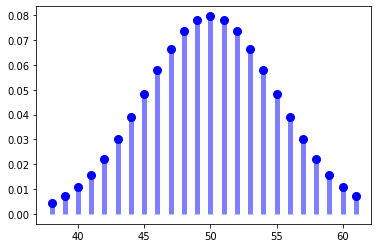

In [ ]:
# 이항확률분포 그래프
from scipy.stats import binom 
import matplotlib.pyplot as plt
import numpy as np

fig, ax =  plt.subplots(1, 1)
n = 100 # 총 시도횟수
p = 0.5 # 각 독립사건 성공확률
x = np.arange(binom.ppf(0.01, n,p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p),'bo', ms=8, label = 'binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw =5, alpha =0.5)

### 📈 이항확률분포 와 이항누적확률분포 예제


H지역 코로나 감염 비율이 10%라고 한다.

1) 10명을 임의 추출하여 코로나 확진여부를 진단했을 때 3명이 확진 될 확률을 계산하시오.

2) 많아야 1명이 감염자일 확률을 구하시오.

3) 적어도 1명 이상이 감염자일 확률을 구하시오.

In [ ]:
# 1) 정답
from scipy.stats import binom
print('1번 :',binom.pmf(k=3, n=10, p=0.1))
# 2) 정답
print('2번 :',binom.cdf(k=1, n=10, p=0.1)) # 이항누적확률분포 : 변수의 값이 k 이하일 확률 = 많아야 k일 확률
# 3) 정답
print('3번 :',1-binom.cdf(k=0, n=10, p=0.1))

1번 : 0.05739562800000007
2번 : 0.7360989291000002
3번 : 0.6513215599


## 💡 카이제곱분포,F분포, 푸아송분포 및 기타 다른 분포들


### 📈 카이제곱분포
- 카이제곱통계량은 검정결과가 독립성에 대한 귀무 기대값에서 벗어난 정도를 측정하는 통계량이다.
- 카이제곱통계량은 관측 데이터가 특정 분포에 '적합'한 정도를 나타낸다(적합도검정). 
- 여러 처리('A/ B/ C....검정')의 효과가 서로 다른지 여부를 결정하는데 유용하다.
- 카이제곱분포는 일반적으로 범주에 속하는 주제 또는 항목의 수와 관련이 있다.
- 카이제곱통계는 귀무 모델의 기댓값에서 벗어난 정도를 측정한다.

### 📈 F분포
- 카이제곱분포에서 말함 A/B/C 검정과 유사하지만 횟수가 아닌 연속된 관측값을 처리한다.
- 이 경우 그룹 평균 간의 차이가 정규 무작위 변동에서 예상할 수 있는것보다 얼마나 큰지에 관심이 있다. 
- F 통계량은 이를 측정하는 것이며, 각 그룹내 변동성에 대한 그룹 평균 간 변동성의 비율을 의미한다.
- 이러한 비교를 분산분석(ANOVA)이라고 한다.
- F 통계량의 분포는 모든 그룹의 평균이 동일한 경우(귀무가설)무작위 순열 데이터에 의해 생성되는 모든 값의 빈도 분포다.
- F 통계량은 회귀모형에 의해 설명된 변동성을 데이터 전체의 변동과 비교하기 위해 선형회귀에도 사용된다. F통계량은 회귀 및 ANOVA 루틴의 일부로 R과 파이썬에 의해 자동으로 생성된다.
- F 통계량은 관심 요인으로 인한 변동성과 전체 변동성을 비교한다.

### 📈 푸아송 분포와 그 외 관련 분포들

#### 📈 용어 정리 
- 람다(lambda) : 단위 시간이나 단위 면적당 사건이 발생하는 비율
- 푸아송 분포(Poisson distribution) : 한 사건에서 그다음 사건까지의 시간이나 거리에 대한 도수분표
- 지수분포(exponential distribution) : 한 사건에서 그다음 사건까지의 시간이나 거리에 대한 도수분포 
- 베이불 분포(Weibull distribution) : 사건 발생률이 시간에 따라 변화하는, 지수분포의 일반화된 버전 

#### 📈 푸아송 분포(Poisson distribution) 

- 시간별 혹은 공간별로 사건 발생이 얼마나 다른지 알고싶을 때가 있다.
- 포아송 분포는 시간단위 또는 공간단위로 표본들을 수집할 때, 그 사건들의 분포를 알려준다.
- 예를 들어 " 5초동안(시간단위) 서버에 도착한 인터넷 트래픽을 95% 확률로 완벽하게 처리하는 데 필요한 용량은 얼마일까?? " 와 같은 질문에 답할 수 있다.
- 푸아송 분포의 핵심 파라미터는 **람다** 이다. 
- 람다는 어떤 일정 시간/공간의 구간 안에서 발생한 평균 사건 수를 의미한다.
- 푸아송 분포의 분산 역시 람다이다.

In [ ]:
from scipy.stats import poisson
stats.poisson.rvs(2, size = 100)

array([2, 2, 0, 1, 2, 1, 0, 3, 1, 2, 2, 3, 1, 0, 2, 2, 1, 0, 3, 3, 0, 1,
       1, 1, 1, 3, 1, 0, 4, 2, 2, 3, 0, 1, 1, 2, 1, 2, 0, 3, 5, 0, 2, 3,
       2, 3, 2, 0, 4, 2, 3, 1, 0, 1, 3, 2, 1, 1, 4, 3, 0, 0, 3, 4, 0, 2,
       0, 5, 1, 2, 2, 3, 3, 3, 1, 2, 3, 1, 2, 1, 4, 2, 1, 3, 0, 4, 2, 1,
       4, 1, 1, 3, 3, 2, 0, 4, 5, 2, 1, 2])

#### 📈 지수분포(exponential distribution)

- 푸아송 분포에 사용된것과 동일한 변수 람다를 사용하여 사건과 사건간의 시간 분포를 모델링할 수 있다.
- 예를 들면 웹사이트 방문이 일어난 시간, 톨게이트에 자동차가 도착하는 시간 사이
- python에서 stats.expon.rvs 함수를 통해 할 수 있다.

In [ ]:
from scipy import stats
stats.expon.rvs(scale = 1/0.2, size = 100)

array([ 2.83161383,  5.87599956,  7.09770444,  6.59539018,  1.34060418,
        0.49024948,  1.78777536,  1.28597865,  3.65150978, 18.05131921,
       12.93383674,  5.77733891,  4.90683437,  6.34247895,  1.60961142,
        0.37324244,  4.70866866,  8.48289424,  0.82206966,  1.40557441,
        0.99249365,  7.313301  ,  8.34125625,  3.72328492, 10.65538525,
        9.30298393, 19.17097226, 14.58095951,  5.59619031, 12.58576007,
        0.18755054, 18.22518184,  0.84582346,  1.80847032,  4.5441468 ,
        1.36294221,  8.85469366,  1.44382618,  3.98929988,  2.1841136 ,
       13.68696508,  1.03064444,  3.59466464,  0.18357611, 10.26427882,
       11.07998498,  8.78256782,  4.19427178,  1.26453015,  8.35450947,
        4.17598366,  0.81432533,  1.35634455,  0.5309874 ,  3.06032343,
        5.27993963,  0.47194573,  4.35436506,  4.08343688,  6.70132127,
        0.05728187,  2.70470197,  6.18029251,  5.59900001,  2.9040693 ,
        7.67056445,  6.22923025,  7.92822789, 15.9841621 , 10.04

- 따라서 분당 평균적으로 0.2회 서비스 문의전화가 걸려오는 경우, 100분동안의 서비스 센터 문의 전화를 시뮬레이션 할 수 있다.
- 푸아송이나 지수분포에 대한 연구에서 핵심은 람다가 해당 기간동안 일정하게 유지 된다는 가정이다. 
- 그러나 이러기는 힘들다 예를들어 도로의 교통상황이나 데이터망의 트래픽의 경우 시간이나 요일에 따라 같을 수가 없기 때문이다. 
- 그래서 시간 주기 또는 공간을, 일정 기간 충분히 동일하게 영역을 잘 나눈다면, 시뮬레이션이 가능할 것이다.

#### 📈 베이불 분포

- 베이불 분포는 사건 발생률이 시간에 따라 지속적으로 변할때 사용하는것으로 해당경우는 지수 또는 포아송 분포는 더이상 유용하지 않는 분포이다. 
- 예를 들어 기계의 고장이 있다, 많은 기계제품의 경우 시간이 지날수록 고장의 위험이 증가한다. 
- 베이불 분포는 지수분포를 확장한 것으로, 형상(shape)파라미터 "베타"로 지정된 대로 발생률이 달라질 수 있다.
- 만약 **베타가 1보다 크면 발생률이 시간이 지남에 따라 증가되며, 베타가 1보다 작으면 감소하게 된다.**
- 베이불 분포는 사건 발생률 대신 고장 시간 분석에 사용되기 때문에 두번째 인수는 구간당 사건 발생률 보다는 특성 수명으로  표현된다.(기호로는 "에타"를 사용한다.)
- 즉, 베이불을 사용할 때는 두 변수 베타와 에타의 추정이 포함된다. 

In [ ]:
from scipy import stats
stats.weibull_min.rvs(1.5, scale = 5000, size = 100)

array([ 4265.23759127,  3068.85781101,  5298.47530956,  1117.92752634,
        5084.18079844,   962.71521674, 11748.36228066,  1984.28337826,
        1466.0073947 ,  4558.06508839,  2488.6629193 ,  2135.61008803,
        5998.23690237,  9197.36889414,  7414.90411677,  6426.54409256,
       12942.7932821 ,   851.29732478,  8014.10926678,  7606.61291446,
        2952.90477905,  4868.86726459,  4412.73106486,  1985.68749633,
        4431.32628231,  3637.13447907,  5867.08133423,  4959.54805177,
        6426.27871362,  8008.24672871, 10216.43843719,   636.05970585,
        5415.8618715 , 12511.86015669,   687.33499027,  2055.68784622,
        1277.16844037,  4211.41786038,  3376.66373307,  2818.48276328,
        4371.96822805,  1885.38737778,  5548.02430733,  3064.9330732 ,
        4652.44592233,  4481.12007505,  1985.15289854,  8652.3248546 ,
        1115.79239363,   734.36696871, 10198.5651487 ,  9042.52167434,
        5942.78334356,  4142.50800588,   964.12584346,  4744.61340226,
      

### 📈 정리
- 일정 비율로 발생하는 사건의 경우, 시간 단위 또는 공간 단위당 발생하는 사건의 수를 푸아송 분포로 모델링할 수 있다.
- 또한 한 사건과 다음 사건 간의 시간/거리를 지수분포로 모델링할 수 있다.
- 시간에 따라 변화하는 사건 발생률(예를 들어 증가하는 고장률)은 베이불 분포로 모델링할 수 있다.

## 💡 A/B검정

### 📈 A/B 검정이란?
- A/B검정은 두 가지의 처리방법, 제품, 절차 중 어느 쪽이 다른 쪽보다 더 우월하다는 것을 입증하기 위해 실험군을 두개로 나누어 진행하는 실험으로 하나는 기존의 방법 혹은 어떠한 처리도 하지않은 대조군 그룹이고 하나는 새로운 처리방법을 채택한 처리군 그룹이라고 부른다.
- 주로 웹 디자인, 마케팅 에서 주로 사용된다. 
- 예를 들어, 두개의 인터넷 광고를 송출하여 어느 것이 더 전환율이 높은지를 측정하는것, 가격을 두가지로 나누어 판매를 했을때 판매율과 순수익, 암을 더 효과적으로 억제하는 두가지 치료방법 검정등이 있다.
- 그룹 A와 그룹 B를 비교하는 데 사용하는 검정통게량 또는 측정 지표에 주의를 기울여야한다.
- 일반적으로 웹상에서 클릭/ 클릭하지않음, 구매/ 구매하지않음 과 같은 것으로 2 X 2표로 요약가능하다.

### 📈 용어정리
- 처리 : 어떤 대상에 주어지는 특별한 환경이나 조건(약, 가격, 인터넷 뉴스제목)
- 처리군 : 특정 처리에 노출된 대상들의 집단.
- 대조군 : 어떤 처리도 하지않은 집단
- 임의화 : 처리를 적용할 대상을 임의로 결정하는 과정
- 검정통계량 : 처리 효과를 측정하기 위한 지표


### 📈 대조군을 사용하는 이유
- 대조군이 없으면 특정한 하나의 처리 외에 다른 것들이 동일하다는 보장이 없기때문에 다른요소가 추가 될 수 있다.
- 그리고 일반적인 A/B검정을 할때는 미리 하나의 측정지표를 결정해놔야한다. 실험을 수행하고 이후에 검정통계량을 선택한다면 연구자의 편향에 빠질 수 있기 때문이다.

### 📈 대조군을 사용하는 이유
- 대조군이 없으면 특정한 하나의 처리 외에 다른 것들이 동일하다는 보장이 없기때문에 다른요소가 추가 될 수 있다.
- 그리고 일반적인 A/B검정을 할때는 미리 하나의 측정지표를 결정해놔야한다. 실험을 수행하고 이후에 검정통계량을 선택한다면 연구자의 편향에 빠질 수 있기 때문이다.

### 📈 A/B검정의 문제점(단점)
- 테스트를 하는데 오래걸리고 비용이 많이든다.(결과가 나올때까지 기다려야한다.)
- A안이 훨씬 좋았다면 테스트하는 기간동안 B안으로 인한 손해를 보게된다.
- A안이 좋았는데 일주일이 지나고 B안이 더 반응이 좋아졌을경우
- Sequential Decision Making에 활용하기 불편(A,B,C비교해야할때 A,B를 비교후 한번의 비교를 더 해야한다.)

### 📈 A/B검정 이후 통계검정
- 웹페이지 A안과 B안을 A/B테스트를 통해 차이가 있다는 것을 알게되었다고 가정해 보자.
- 그렇다면 이 차이가 실제로 유의미한 차이인지 우연에 의한 차이인지 검정을 해봐야한다.(가설검정)
- 그렇기 위해서는 두가지 방법이 있는데 T검정을 통해 두 안건의 평균의 차이가 유의미한차이인지 확인하는 방법과 순열검정을통해 유의미한 차이인지 확인하는것이다.
- 순열검정은 비모수적 검정이고, T검정의 경우 모수적 검정이기 때문에 정규성 검정을 먼저 하고 정규성을 띄지 않는다고 판단되면 비모수 검정인 순열검정, 정규성을 띈다면 모수검정을 하면된다.
- 일반적으로 30개 이하는 정규분포를 띄지 않을가능성이 높은데 이때 는 순열검정을 쓰는이유가 재표본추출(RESAMPLING)을 통해 표본을 계속해서 만들어주기 위함이다.


## 💡 가설검정

> 가설검정 혹은 유의성검정의 목적은 관찰된 효과가 우연에 의한것인지 여부를 알아내는 것이다. 

### 📈 용어 정리
- 귀무가설 : 우연 때문이라는 가설
- 대립가설 : 귀무가설과 대조(증명하고자 하는 가설)
- 일원검정(one-way test) : 한 방향으로만 우연히 일어날 확률을 계산하는 가설검정
- 이원검정(two-way test) : 양방향으로 우연히 일어날 확률을 계산하느 가설검정

### 📈 가설을 세워야 하는이유
- 임의성을 과소평가하려는 인간의 경향 
	- 동전던지기 50번을 예로들면 연속해서 앞면이 6~7번이 나오는 경우가 그렇게 이상한 일은아니다. 확률적으로 높지는 않지만 일어날 수 있는 일이다. 하지만 사람들은 앞면이 연속으로 3~4번이 나왔으면 다음은 뒷면이 나올것이라고 마치 최면을 거는듯한 생각을 가지게 될것이다. 실제로 이렇게 우연하게 6~7번이 앞면으로 나온것이 단순한 우연이 아닌 어떠한 의미가 있을것이라고 생각하는 경향이 있다.

- 즉, 무작위 사건을 어떤 중요한 의미가 있는 패턴을 갖는 것으로 오해하는 경향이 있기때문

- 통계적 가설검정은 연구자가 랜덤하게 우연히 일어난 일에 속지 않도록 보호하기 위한 방법으로 개발되었다.

- 통계 가설검정이란 그룹 A와 그룹 B를 사이의 차이가 우연에 의한 것인지를 평가하기 위해 A/B검정이나 더 나아가 그 외 여러 무작위 실험을 포함하는 분석을 의미한다.

### 📈 귀무가설
- 사람들은 우연히 발생한 일이라도 흔하지 않다면 무언가 의미가 있을거라고 해석하는 경향이 있다. 그래서 실험에서 얻은 그룹간의 차이가 무작위로 얻을 수 있는 합리적인 수준과는 극단적으로 다르다는 증거를 필요로 한다.

- 즉, 그룹간의 차이는 우연에 의한 결과라는 것이 기본가정이고 이를 귀무가설이라고 부른다.

- 우연에 의한 결과 = 차이가 없을것이다.
- 따라서 귀무가설이 틀렸다는 것을 입증해서 A그룹과 B그룹 간의 차이가 우연이 아니라는 것을 보여주는 것이 모두의 희망이다.
- 이를 위한 방법중 재표본추출중 순열검정을 통한 방법이 있다. 
- A와 B그룹의 결과를 서로 섞어서 비스한 크기의 그룹들을 반복적으로 만든 다음, 관찰된 차이를 각 경우에서 발생되는 차이와 비교했을때 얼마나 극단적인지 관찰하는 방법이다.
- 그룹 A와 B를 섞어서 만든 결과들을 결합한 것과 이들로부터 재표본하는 절차는 그룹 A와 B가 동등하고 상호교환이 가능하다는 귀무가설을 구현하는 것이다.

### 📈 대립가설

- 디립가설은 귀무가설과 대립되는 가설로서 귀무가설과 대립가설을 합치면 모든 가능성을 설명할 수 있어야합니다.
- 대립가설 예시
귀무가설 : 그룹A와 그룹 B의 평균에는 차이가 없다.
대립가설 : A는 B와 다르다 (더 크거나 작을 수 있다.)

귀무가설 : A <= B 
대립가설 : A > B

### 📈 일원/ 이원 가설검정
- 보통 A/B검정에서는 새로 처리한 옵션이 완벽히 더 나은것으로 입증되지 않는 이상, 기본 옵션을 계속 사용한다는 것이 가정이다.
- 즉, B를 선호하는 방향으로 우연에 의해 속지 않도록 가설검정 하기를 원할 것이다.
- 따라서 우리는 방향성을 고려한 대립가설이 필요하다.
- B는 A보다 낫다. => 일원가설검증 : 우연에 의한 극단적인 결과에 대해 한 방향만을 고려하여 P값을 계산한다는 의미이다.
- 어느 쪽으로도 속지 않도록 가설검증을 원한다면 양방향이 된다. 이를 이원가설검증 방법이라한다. : 우연에 의한 극단적인 결과가 양쪽에서 나타날 P값을 계산한다는 것을 의미한다.
- 보통 A/B검정 특성상(B가 A보다 좋다) 일원가설검증이 더 잘어울리지만 논쟁을 피하기 위해 더 보수적인 이원가설검증을 선택한다. 하지만 이것이 데이터과학자에게 그렇게 중요한 쟁점은 아니다.


## 💡 재표본추출2(순열검정)

> 통계학에서 재표본추출이란 랜덤한 변동성을 알아보기위함. 이라는 일반적인 목표를 가지고 관찰된 데이터를 반복추출하는것을 의미하며, 일부 머신러닝(ML)모델의 정확성을 평가하고 향상시키는데 사용할 수 있다.(의사결정트리, 배깅)


### 📈 재표본추출
- 재표본추출에는 부트스트랩과 순열검정이라는 두 가지 주요 유형이 있다. 기초통계(10)에서 부트스트랩과 간단하게 순열검정도 다루어봤었다. **부트스트랩의 경우 추정의 신뢰성을 평가하기 위해 사용되었으며**, 순열검정에 대해서 이번에 자세히 다루어 보려고 한다.
- **순열검정은 일반적으로 두 개 이상의 그룹과 관련된 가설을 검증하는 데 사용된다.**


### 📈 용어정리
- 순열검정(permutaion test) : 두 개 이상의 표본을 함께 결합하여 관측값들을 무작위로(또는 전부를)재표본으로 추출하는 과정을 말한다.
- 재표본추출 : 관측 데이터로부터 반복해서 표본추출하는 과정


### 📈 순열검정
- 순열과정에는 두 개 이상의 표본이 관여되며 이들은 보통 A/B 검정 또는 기타 가설검정을 위해 사용되는 그룹들이다.
- 순열검정의 첫 단계는 그룹A와 B의(혹은 C, D... 여러개 가능) 결과를 하나로 합치는 것이다.
- 이렇게 하는 이유는 그룹들에 적용된 처리의 결과가 다르지 않다는 귀무가설의 논리를 구체화 한 것이다. 
- 그런다음 결합된 집합에서 무작위로 그룹을 뽑아 가설을 검정하고 얼마나 다른지를 살핀다.

**< 순열검정 순서 >**

1. 여러그룹의 결과를 단일 데이터 집합으로 결합한다.
2. 결합된 데이터를 잘 섞은 후, 그룹A와 동일한 크기의 표본을 무작위로(비복원) 추출한다.(당연히 다른 그룹의 데이터와 함께 섞었기때문에 포함된다)
3. 나머지 데이터에서 그룹B와 동일한 크기의 샘플을 무작위로(비복원)추출한다.
4. C, D 등 추가적인 다른그룹도 있었다면 해당 그룹에도 똑같은 방법을 사용한다.
5. 원래 샘플(그룹 비율의 차이)에 대해 구한 통계량 또는 추정치가 무엇이었든 간에 새롭게 추출한 재표본에 대해 다시 계산하고 기록한다. 이것으로 순열이 한번 진행된 것이다.
6. 앞의 단계를 R번 반복하여 검정통계량의 순열분포를 얻는다.

- 이제 처음 그룹간의 차이와 비교를 해보면된다.
- 관찰된 차이가 순열로 보이는 차이의 집합안에 들어있으면, 어떠한것도 증명할 수 없다. 즉, 우연히 일어날 수 있는 범위에 있기 때문에 귀무가설이 맞을 확률이 높은것이다.
- 관찰된 차이가 대부분의 순열분포의 바깥에 있다면, 이떄 우연때문이 아니라고 생각해 볼 수 있다. 즉, 이 차이는 통계적으로 유의미 하다는 결론을 낼 수도 있다.


### 📈 예제

- 사람들의 관심을 오래 끌 수 있는 웹 디자인이 더 많은 매출을 만들 거라고 생각하는 것은 합리적이다. 따라서 측정 지표를 페이지 A와 페이지 B에서의 평균 세션 시간을 비교하는 것으로 정할 수 있다.
- 두가지 서로 다른 디자인에 대해 총 36세션, 페이지A는 21, 페이지 B는 15가 기록이 되었다.BOXPLOT을 통해 비교해 보자

In [ ]:
# 데이터 불러오기
session_times

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0
5,Page B,85.0
6,Page A,211.0
7,Page B,246.0
8,Page A,132.0
9,Page B,149.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

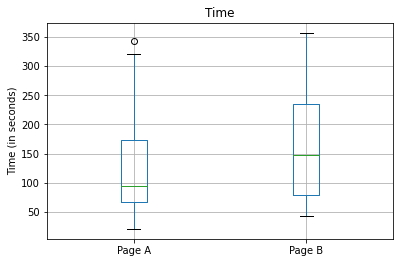

In [ ]:
# visualization
ax = session_times.boxplot(by = 'Page', column = 'Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('') # 모든 서브플롯에 메인타이틀을 부여한다.


위의 boxplot을 보면 페이지 B가 방문객들을 더 오래 붙잡은 것으로 나타난다.





 각 그룹의 평균을 확인해보면

In [ ]:
mean_a = session_times[session_times.Page =='Page A'].Time.mean()
mean_b = session_times[session_times.Page =='Page B'].Time.mean()

print(f'mean_a : {mean_a}')
print(f'mean_b : {mean_b}')
print(f'mean_b - mean_a: {mean_b - mean_a}')

mean_a : 126.33333333333333
mean_b : 162.0
mean_b - mean_a: 35.66666666666667


- 페이지 B는 페이지 A와 비교하여 세션시간이 평균 35.67초 정도 더 길다. 
- 하지만, 우리가 확인하고 싶은것은 지금나온 이 차이가 우연에 의한 것인지를 판단하는것이다.
- 순열검정을 통해 모든 세션 시간을 결합한 다음, 잘 섞은 후 21개의 그룹(A페이지의 경우 21)과 15개의그룹(B의경우 15)으로 반복하여 표본을 추출한다.
- 순열검정을 적용하기위해서는 36개의 세션 시간을 21개 와 15개의 그룹에 랜덤하게 할달해야한다.

In [ ]:
# 순열검정을 구현하는 함수
import random

def perm_fun(x, nA, nB):
  n = nA + nB # 두개의 데이터를 단일로 합쳐준다.
  idx_B = set(random.sample(range(n),nB)) # 1. 비복원 추출 방식으로 nB개의 표본을 추출하여 그룹 B에 할당
  idx_A = set(range(n)) - idx_B # 2. 나머지 nA개는 그룹 A에 할당
  return x.loc[idx_B].mean() - x.loc[idx_A].mean() # 두 그룹 간 평균 차이 계산

# 페이지 A, B의 갯수 저장
nA = session_times[session_times.Page == 'Page A'].shape[0] 
nB = session_times[session_times.Page == 'Page B'].shape[0]

- perm_fun 함수는 비복원추출 방식으로 nB개의 표본을 추출하고 그룹 B에 할당한다.
- 나머지 nA개를 그룹 A에 할당한다. 
- 이때 두 평균의 차이를 결과로 반환한다.

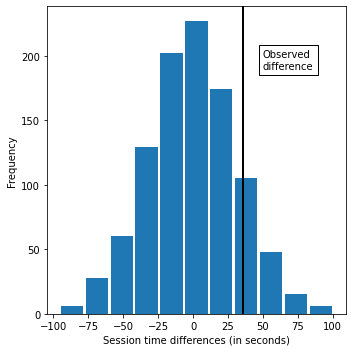

In [ ]:
# 함수를 1000번 호출하여 히스토그램 시각화

random.seed(1)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
print(np.mean(perm_diffs > mean_b - mean_a))
# 0.121 

TypeError: ignored

페이지 A와 페이지 B사이의 세션 시간의 차이가 확률분포의 범위 내에 있음을 의미하며, 12.1%의 확률로 차이가 있을 수도 있다. 따라서 차이는 통계적으로 유의하지 않다.

### 📈 순열검정 : 데이터 과학의 최종 결론

- 순열검정은 랜덤한 변이가 어떤 역할을 하는지 알아보기 위해 사용되는 휴리스틱한 절차이다. 
- 이는 상대적으로 코딩하고, 해석하고, 설명하기 쉽다. 그리고 정확성을 보증할 수 없는, 수식에 기반을 둔 통계학이 빠지기 쉬운 형식주의와 '거짓 결정론'에 대한 유용한 우회로를 제공한다.

### 📈 주요개념 
- 순열검정에서는 여러 표본을 결합한 다음 잘 섞는다.
- 그런 다음 섞인 값들을 이용해 재표본추출 과정을 거쳐, 관심 있는 표본통계량을 계산한다.
- 이과정을 반복하여 재표본추출한 통계를 도표화한다.
- 관측된 통계량을 재표본추출한 분포와 비교하면 샘플간에 관찰된 차이가 우연에 의한 것인지를 판단할 수 있다.


## 💡 통계적 유의성과 P값


> 통계적 유의성이란 통계학자가 자신의 실험(또는 기존 데이터에 대한 연구) 결과가 우연히 일어난 것인지 아니면 우연히 일어날 수 없는 극단적인 것인지를 판단하는 방법이다. 결과가 우연히 벌어질 수 있는 변동성 바깥에 존재한다면 우리는 이것을 통계적으로 유의하다고 말한다.


### 📈 용어정리
- P값 (P-value) : 귀무가설을 구체화한 기회 모델이 주어졌을 때 **관측된 결과와 같이 특이하거나 극단적인 결과를 얻을 확률**
- 알파 (alpha) : 실제 결과가 통계적으로 의미 있는 것으로 간주되기 위해, 우연에 의한 결과가 능가해야 하는 '비정상적인' 가능성의 임계확률
- 제 1종 오류 : 우연에 의한 효과를 실제 효과로 잘못 결론 내리는 것.
- 제 2종 오류 : 실제 효과를 우연에 의한 효과로 잘못 결론 내리는 것.

### 📈 p값
- 그래프를 눈으로 보는 것보다 p값과 같은 통계적 유의성을 정확히 측정하기 위한 지표가 필요하다.
- 이는 확률모형이 관측되는 결과보다 더 극단적인 결과를 생성하는 빈도라고 할 수 있다. 
- "어떤 사건이 우연히 발생할 확률" = "우연히 발생했으니 비교대상은 서로 차이가 없다" = "귀무가설이 기각되지 않을 확률"

### 📈 유의수준
- 우연히 얻은(귀무가설) 결과의 5%보다 더 극단적인 결과와 같이 어떤 임계값(5%)을 미리 지정하는 것을 선호한다.
- 이 임계값을 보통 유의수준(알파, alpha)라고 한다.
- 많이 사용되는 유의수준은 5%와 1%이다. 
- 많이사용되는 유의수준이라는 문장만 보아도 이 값이 임의로 선택된다는 것을 알 수있다.
- 따라서 올바른 x%를 보장하는 프로세스는 없다. 즉, 확률문제가 '우연히 일어날 확률은 무엇인가?'가 아니라 **'랜덤한 모델이 주어졌을때, 극단적인 결과가 나올 확률은 어느정도인가?'** 이기 때문이다.

### 📈 p값에 대한 논란들
- p값을 너무 확대해석하고 온갖 검정들을 p값으로 정하는 경우가 많다. 
- 하지만, 우리가 p값을 통해 실제로 전달하고자 하는것은 **결과가 우연에서 비롯될 확률**이다.
- 우리는 더 낮은 p값을 원하고 뭔가를 증명했다고 결론을 내리기 원하지만 그저 **랜덤한 모델이 주어졌을때, 그 결과가 관찰된 결과보다 더 극단적일 확률** 정도이다.
- p값이 유의미하다고 해서 증거가 되지는 않고 통계적으로 유의미하다는 결론에 대한 논리적인 근거로서는 약하다고 볼 수 있다.

### 📈 미국통계협회의 p값에대한 6가지 원칙
- p값은 이 데이터가 특정 통계 모델과 얼마나 상반되는지 나타낼 수 있다.
- p값은 연구 가설이 사실일 확률이나, 데이터가 랜덤하게 생성되었을 확률을 측정하는 것은 아니다.
- 과학적 결론, 비즈니스나 정책 결정은 p값이 특정 임계값을 통과하는지 여부를 기준으로 해서는 안된다.
- 적절한 추록을 위해서는 완전한 보고서와 투명성이 요구된다.
- p값 또는 통계적 유의성의 효과는 크기나 결과의 중요성을 의미하지 않는다.
- p값 그자체는 모델이나 가설에 대한 증거를 측정하기 위한 좋은 지표가 아니다.


### 📈 실제로 유의미의 의미
- 결과가 통계적으로 유의미 하다고 해서 실제적으로 유의미 하다는 뜻은 아니다.
- 실질적으로 의미가 없는 작은 차이라도 표본이 충분히 클 경우 통계적으로 유의하다는 결과가 나올 수 있다.
- 표본이 클수록, 작고 의미없는 효과가 우연이라고 볼 수 없을 만큼 충분히 크게 보일 수 있다.

### 📈 1종 오류와 2종 오류
- 1종 오류 : 어떤 효과가 우연히 발생한 것인데, 그것이 사실이라고 잘못 판단하는 경우
- 2종 오류 : 어떤 효과가 실제로 있는 것인데, 그것이 우연히 발생한 것이라고 잘못 판단하는 경우

실제로 2종 오류는 어떤 오류라기보다는 표본의 크기가 너무 작아서 효과를 알아낼수 없다고 판단하는것과 같다. 즉, 표본이 적을 경우 우연히 일어난 것이라고 착각할 수 있다. p값이 통게적 유의성에 미치지 못하는 경우(예를 들어 5%초과), 실제 의미는 '효과가 아직 입증 되지 않았다'는 뜻이다. 표본크기가 더 클수록 p값이 더 작아진다.

유의성검정(가설검정)의 기본 기능은 우연히 일어난 일을 구분하고 속지 않게 하는것이므로 보통 1종 오류를 최소화 하도록 가설을 설계한다.

### 📈 정리
- 관심있고, 유용한 모델의 결과가 일반적인 랜덤 변이의 범위에 있는지를 알기위해서 사용하는 유용한 측정지표이다
- 유의성 검정은 무작위 변이의 범위내에 있는지 결정하는 데 사용된다.
- p값은 귀무가설로 부터 나올 수 있는 결과가 관찰된 결과만큼 극단적으로 나타날 확률다.
- 유의수준(알파, alpha)는 귀무가설 모델에서 '비정상'이라고 판단할 임계값을 말한다.